In [0]:
%tensorflow_version 1.x

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
FOLDER_PATH = '/content/drive/My Drive/DL/keras-yolo3-blood-cell'
import sys
sys.path.append(FOLDER_PATH)

In [0]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
import os

Using TensorFlow backend.


In [0]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/bccd_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep054-loss69.912-val_loss72.532.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/content/drive/My Drive/keras-yolo3-blood-cell/ep054-loss69.912-val_loss72.532.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/keras-yolo3-blood-cell/dataset/train_img/BloodImage_00229.jpg
(640, 480) (416, 416)
(416, 416, 3)
Found 16 boxes for img
RBC 0.20 (13, 409) (111, 480)
RBC 0.21 (10, 15) (66, 96)
RBC 0.24 (61, 196) (168, 293)
RBC 0.31 (519, 264) (632, 396)
RBC 0.40 (328, 69) (425, 202)
RBC 0.42 (23, 322) (117, 412)
RBC 0.44 (132, 107) (220, 208)
RBC 0.49 (354, 331) (495, 470)
RBC 0.49 (220, 0) (335, 65)
RBC 0.53 (460, 73) (555, 176)
RBC 0.62 (113, 38) (201, 124)
RBC 0.68 (400, 160) (510, 262)
RBC 0.84 (109, 282) (207, 407)
Platelets 0.32 (229, 193) (259, 233)
Platelets 0.71 (512, 427) (542, 465)
WBC 0.93 (203, 248) (353, 410)
7.383920760000024


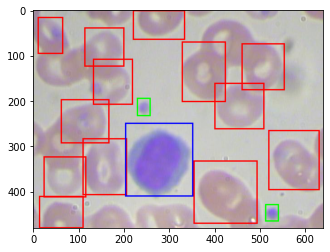

In [0]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

In [0]:
# COCO pre-trained
classes_path = os.path.join(FOLDER_PATH, 'model_data/coco_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'yolo_weights.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras-yolo3-blood-cell/yolo_weights.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras-yolo3-blood-cell/street.jpeg
(273, 185) (416, 416)
(416, 416, 3)
Found 11 boxes for img
car 0.21 (5, 101) (34, 111)
car 0.40 (75, 98) (88, 105)
car 0.50 (55, 98) (77, 106)
person 0.84 (157, 89) (175, 153)
person 0.95 (92, 124) (100, 152)
person 0.95 (83, 128) (91, 156)
person 0.98 (196, 110) (215, 172)
person 0.98 (174, 100) (201, 174)
person 0.98 (146, 106) (165, 169)
person 0.99 (115, 98) (139, 166)
person 0.99 (218, 112) (239, 171)
2.647631684999965


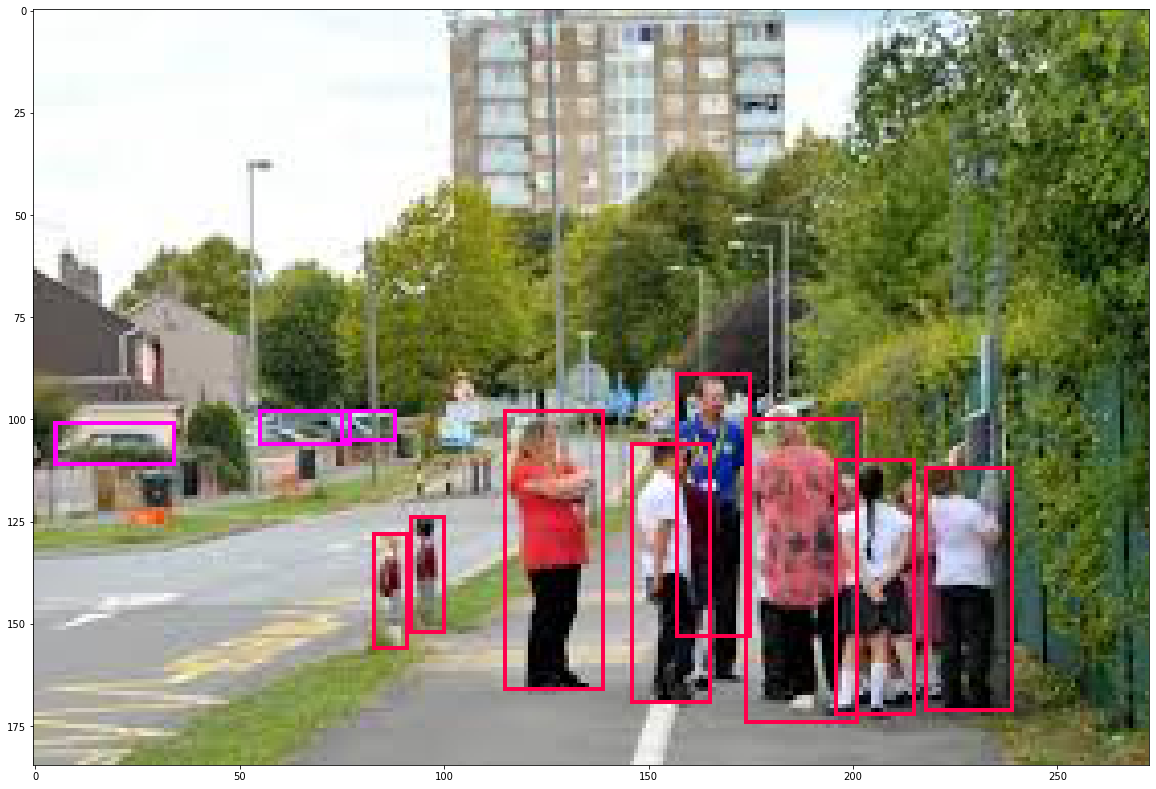

In [0]:
path = os.path.join(FOLDER_PATH, 'street.jpeg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(20,20))
plt.imshow(r_image)